In [ ]:
!pip install -qU openai pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.8 MB/s eta 0:00:00


In [ ]:
!pip install -qU torchvision

In [ ]:
!pip install torch==1.13.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 859.6 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.0 which is incompatible.
torchvision 0.15.2 requires torch==2.0.1, but you have torch 1.13.0 which is incompatible.


In [ ]:
 !pip install    seaborn \
                 tqdm \
                 httpimport \
                 requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import requests

import tqdm
import httpimport
import pinecone
import numpy as np
from PIL import Image

import torch
import torchvision

DATA_DIRECTORY = 'tmp'
INDEX_NAME = 'image-search'
INDEX_DIMENSION = 1000
BATCH_SIZE=200

In [ ]:
import pinecone
import os

api_key = "YOUR_KEY"
pinecone.init(api_key=api_key, environment="asia-southeast1-gcp-free")  # may be different, check at app.pinecone.io

In [ ]:
from scipy.io import loadmat
from PIL import Image
from torch.utils.data import Dataset
import os

class StanfordCarsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.annotations = loadmat(os.path.join(root_dir, 'cars_annos.mat'))

    def __len__(self):
        return len(self.annotations['annotations'][0])

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations['annotations'][0][idx][0][0])
        img = Image.open(img_name)
        label = self.annotations['annotations'][0][idx][-2][0][0]
        
        if self.transform:
            img = self.transform(img)
            
        return img, label-1  # Labels are 1-based in the .mat file, so subtract 1 to make them 0-based


In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = StanfordCarsDataset(root_dir='/content/archive.zip', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
from torchvision.models import resnet50
import pinecone

# Load and preprocess image
img = Image.open("/content/08030.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_t = preprocess(img)
img_t = img_t.unsqueeze(0)  # Add batch dimension

# Load pre-trained ResNet50 model
model = resnet50(pretrained=True)
model.eval()

# Pass image through model to get embedding
with torch.no_grad():
    embedding = model(img_t)

# Flatten the embedding to 1D and convert to a list
embedding = embedding.flatten().tolist()
print(len(embedding ))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


1000


In [ ]:
# Initialize Pinecone
api_key = "YOUR_KEY"
# YOUR_API_KEY"
pinecone.init(api_key=api_key)



In [ ]:
from torchvision import datasets
import random

random_seed = 123
random.seed(random_seed)

# Select a random sample of image classes
image_classes = set(random.sample(range(200), 5))

# Get the corresponding image file names
image_file_names = [
    file_name
    for file_name, label in datasets.ImageFolder(f"{IMAGENET_DIR}/train").imgs
    if label in image_classes
]

In [ ]:
import requests, os, zipfile

DATA_DIR = "tmp"
IMAGENET_DIR = f"{DATA_DIR}/tiny-imagenet-200"
IMAGENET_ZIP = f"{DATA_DIR}/tiny-imagenet-200.zip"
IMAGENET_URL = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"


def download_data():
    os.makedirs(DATA_DIR, exist_ok=True)

    if not os.path.exists(IMAGENET_DIR):
        if not os.path.exists(IMAGENET_ZIP):
            r = requests.get(IMAGENET_URL)  # create HTTP response object
            with open(IMAGENET_ZIP, "wb") as f:
                f.write(r.content)

        with zipfile.ZipFile(IMAGENET_ZIP, "r") as zip_ref:
            zip_ref.extractall(DATA_DIR)


download_data()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


def show_images_horizontally(file_names):
    m = len(file_names)
    fig, ax = plt.subplots(1, m)
    fig.set_figwidth(1.5 * m)
    for a, f in zip(ax, file_names):
        a.imshow(Image.open(f))
        a.axis("off")
    plt.show()


def show_image(file_name):
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(1.3)
    ax.imshow(Image.open(file_name))
    ax.axis("off")

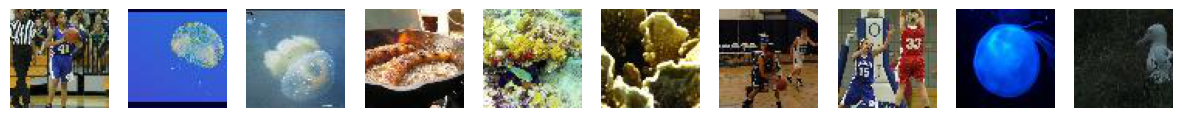

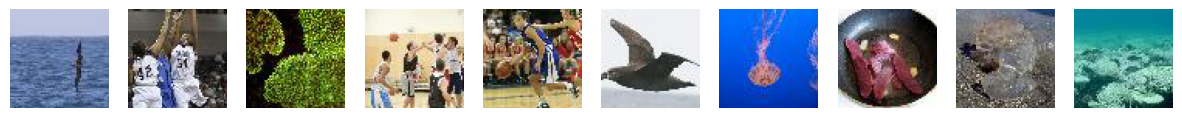

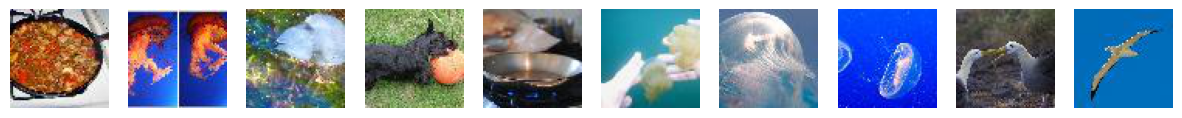

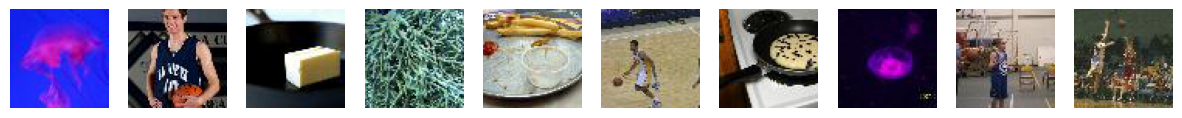

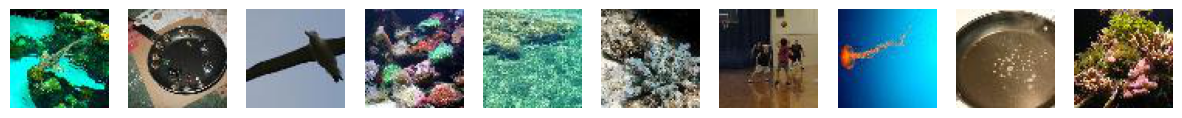

In [ ]:
import random
for i in range(5):
    show_images_horizontally(random.sample(image_file_names, 10))

In [ ]:
from torchvision import transforms as ts
import torchvision.models as models


class ImageEmbedder:
    def __init__(self):
        self.normalize = ts.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
        # see https://pytorch.org/vision/0.8/models.html for many more model options
        self.model = models.squeezenet1_0(pretrained=True, progress=False)  # squeezenet

    def embed(self, image_file_name):
        image = Image.open(image_file_name).convert("RGB")
        image = ts.Resize(256)(image)
        image = ts.CenterCrop(224)(image)
        tensor = ts.ToTensor()(image)
        tensor = self.normalize(tensor).reshape(1, 3, 224, 224)
        vector = self.model(tensor).cpu().detach().numpy().flatten()
        return vector


image_embedder = ImageEmbedder()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


In [ ]:
from tqdm import tqdm
import pandas as pd

df = pd.DataFrame()
df["image_file_name"] = image_file_names
df["embedding_id"] = [
    file_name.split(IMAGENET_DIR)[-1] for file_name in image_file_names
]
df["embedding"] = [
    image_embedder.embed(file_name).tolist()
    for file_name in tqdm(image_file_names, miniters=int(len(image_file_names) / 100))
]
df = df.sample(frac=1)  # shuffle the images

100%|██████████| 2500/2500 [03:56<00:00, 10.56it/s]


In [ ]:
df.head(3)

,image_file_name,embedding_id,embedding
936,tmp/tiny-imagenet-200/train/n02058221/images/n...,/train/n02058221/images/n02058221_491.JPEG,"[13.083158493041992, 10.515169143676758, 6.370..."
908,tmp/tiny-imagenet-200/train/n02058221/images/n...,/train/n02058221/images/n02058221_466.JPEG,"[9.09177303314209, 3.473360776901245, 7.670419..."
462,tmp/tiny-imagenet-200/train/n01910747/images/n...,/train/n01910747/images/n01910747_65.JPEG,"[6.3733229637146, 12.673693656921387, 8.061985..."


In [ ]:
len(df.embedding[4])

1000

In [ ]:
df.shape

(2500, 3)

In [ ]:
cutoff = int(len(df) * 0.95)
item_df, query_df = df[:cutoff], df[cutoff:]
(item_df.shape, query_df.shape)


((2375, 3), (125, 3))

In [ ]:
# Choosing an arbitrary name for my index
index_name = "image"

# Checking whether the index already exists.
# if index_name not in pinecone.list_indexes():
#     pinecone.create_index(index_name, dimension=1000, metric="euclidean", shards=1)

In [ ]:
pinecone.init(api_key=api_key, environment="asia-southeast1-gcp-free")  # may be different, check at app.pinecone.io
index = pinecone.Index(index_name=index_name)

In [ ]:
import itertools

def chunks(iterable, batch_size=10):
    it = iter(iterable)
    chunk = tuple(itertools.islice(it, batch_size))
    while chunk:
        yield chunk
        chunk = tuple(itertools.islice(it, batch_size))

In [ ]:
for batch in chunks(zip(item_df.embedding_id, item_df.embedding), 100):
    index.upsert(vectors=batch)

In [ ]:
query_df.head(3)

,image_file_name,embedding_id,embedding
1134,tmp/tiny-imagenet-200/train/n02802426/images/n...,/train/n02802426/images/n02802426_219.JPEG,"[8.148537635803223, 6.883230686187744, 4.28032..."
2456,tmp/tiny-imagenet-200/train/n09256479/images/n...,/train/n09256479/images/n09256479_6.JPEG,"[10.874858856201172, 10.171445846557617, 9.753..."
553,tmp/tiny-imagenet-200/train/n02058221/images/n...,/train/n02058221/images/n02058221_146.JPEG,"[7.97415018081665, 2.1764705181121826, 10.5837..."


In [ ]:
import time


start = time.perf_counter()
total_res = list()
for batch in chunks(query_df[:10].embedding):
    res = index.query(batch, top_k=1)  # issuing queries
    total_res += [res.matches for res in res.results]

end = time.perf_counter()
print("Run this test on a fast network to get the best performance.")

ApiException: ignored

In [86]:
import numpy as np

# assuming chunks, query_df, and index are already defined

# # Check the dimension of your vectors
# for batch in chunks(query_df[:10].embedding):
#     print(np.array(batch).shape)  # Should be (N, 1000) where N is the batch size
#     print(batch)
    # res = index.query(batch, top_k=2)  # issuing queries
    # total_res += [res.matches for res in res.results]

(10, 1000)
([8.148537635803223, 6.883230686187744, 4.28032922744751, 5.234018802642822, 6.059145450592041, 9.08127212524414, 2.65425181388855, 5.899738788604736, 5.414441108703613, 5.937526702880859, 7.167957305908203, 3.2501213550567627, 4.915920257568359, 2.9110825061798096, 5.4982709884643555, 4.230418682098389, 3.4293324947357178, 2.635176658630371, 2.6199800968170166, 3.5040178298950195, 4.4014692306518555, 5.984518051147461, 3.2374184131622314, 3.6667513847351074, 2.580503463745117, 4.652928829193115, 8.744656562805176, 6.385861396789551, 7.9767374992370605, 6.5700602531433105, 5.722607135772705, 4.429041862487793, 6.570285797119141, 6.6243896484375, 7.954717636108398, 8.3678617477417, 10.072750091552734, 4.6764936447143555, 7.45168399810791, 5.666976451873779, 4.274868011474609, 5.220660209655762, 5.066722393035889, 9.808367729187012, 6.431458473205566, 6.648499011993408, 3.4469492435455322, 5.842767715454102, 5.977413654327393, 7.286853790283203, 5.427578926086426, 13.180424690

ApiException: ignored

In [98]:
res = index.query(query_df.loc[1134,'embedding'], top_k=5)  # issuing queries

In [99]:
res

{'matches': [{'id': '/train/n02802426/images/n02802426_195.JPEG',
              'score': 1743.125,
              'values': []},
             {'id': '/train/n02802426/images/n02802426_24.JPEG',
              'score': 2240.73438,
              'values': []},
             {'id': '/train/n02802426/images/n02802426_12.JPEG',
              'score': 2867.64062,
              'values': []},
             {'id': '/train/n02802426/images/n02802426_422.JPEG',
              'score': 2897.59375,
              'values': []},
             {'id': '/train/n02802426/images/n02802426_479.JPEG',
              'score': 2969.6875,
              'values': []}],
 'namespace': ''}

In [120]:
import time


start = time.perf_counter()
total_res = list()
for img in query_df.embedding:
    res = index.query(img, top_k=10)  # issuing queries
    total_res.append(res)

end = time.perf_counter()
print("Run this test on a fast network to get the best performance.")
# print(f"Service throughput is {int(len(query_df)/(end-start))} queries/second.")

Run this test on a fast network to get the best performance.


In [123]:
len(total_res)

125

In [124]:
total_res[:5]

[{'matches': [{'id': '/train/n02802426/images/n02802426_195.JPEG',
               'score': 1743.125,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_24.JPEG',
               'score': 2240.73438,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_12.JPEG',
               'score': 2867.64062,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_422.JPEG',
               'score': 2897.59375,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_479.JPEG',
               'score': 2969.6875,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_376.JPEG',
               'score': 3002.75,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_289.JPEG',
               'score': 3033.57812,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_497.JPEG',
          

In [122]:
for i in range(30, 40):
    print(f"Query {i+1} and search results")
    ids = [match.id for match in total_res[i]]
    show_image(query_df.image_file_name.iloc[i])
    show_images_horizontally(
        [IMAGENET_DIR + embedding_id for embedding_id in ids]
    )

    print("-" * 80)

Query 31 and search results


ApiAttributeError: ignored

In [108]:
 res['matches'][0]['id']

'/train/n02802426/images/n02802426_195.JPEG'

In [94]:
query_df.head(3)

,image_file_name,embedding_id,embedding
1134,tmp/tiny-imagenet-200/train/n02802426/images/n...,/train/n02802426/images/n02802426_219.JPEG,"[8.148537635803223, 6.883230686187744, 4.28032..."
2456,tmp/tiny-imagenet-200/train/n09256479/images/n...,/train/n09256479/images/n09256479_6.JPEG,"[10.874858856201172, 10.171445846557617, 9.753..."
553,tmp/tiny-imagenet-200/train/n02058221/images/n...,/train/n02058221/images/n02058221_146.JPEG,"[7.97415018081665, 2.1764705181121826, 10.5837..."


In [95]:
query_df.loc[1134,'embedding']

[8.148537635803223,
 6.883230686187744,
 4.28032922744751,
 5.234018802642822,
 6.059145450592041,
 9.08127212524414,
 2.65425181388855,
 5.899738788604736,
 5.414441108703613,
 5.937526702880859,
 7.167957305908203,
 3.2501213550567627,
 4.915920257568359,
 2.9110825061798096,
 5.4982709884643555,
 4.230418682098389,
 3.4293324947357178,
 2.635176658630371,
 2.6199800968170166,
 3.5040178298950195,
 4.4014692306518555,
 5.984518051147461,
 3.2374184131622314,
 3.6667513847351074,
 2.580503463745117,
 4.652928829193115,
 8.744656562805176,
 6.385861396789551,
 7.9767374992370605,
 6.5700602531433105,
 5.722607135772705,
 4.429041862487793,
 6.570285797119141,
 6.6243896484375,
 7.954717636108398,
 8.3678617477417,
 10.072750091552734,
 4.6764936447143555,
 7.45168399810791,
 5.666976451873779,
 4.274868011474609,
 5.220660209655762,
 5.066722393035889,
 9.808367729187012,
 6.431458473205566,
 6.648499011993408,
 3.4469492435455322,
 5.842767715454102,
 5.977413654327393,
 7.28685379028

In [129]:
query_df.columns

Index(['image_file_name', 'embedding_id', 'embedding'], dtype='object')

In [127]:
len(total_res)


125

In [128]:
total_res[:2]

[{'matches': [{'id': '/train/n02802426/images/n02802426_195.JPEG',
               'score': 1743.125,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_24.JPEG',
               'score': 2240.73438,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_12.JPEG',
               'score': 2867.64062,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_422.JPEG',
               'score': 2897.59375,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_479.JPEG',
               'score': 2969.6875,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_376.JPEG',
               'score': 3002.75,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_289.JPEG',
               'score': 3033.57812,
               'values': []},
              {'id': '/train/n02802426/images/n02802426_497.JPEG',
          

In [125]:
IMAGENET_DIR

'tmp/tiny-imagenet-200'

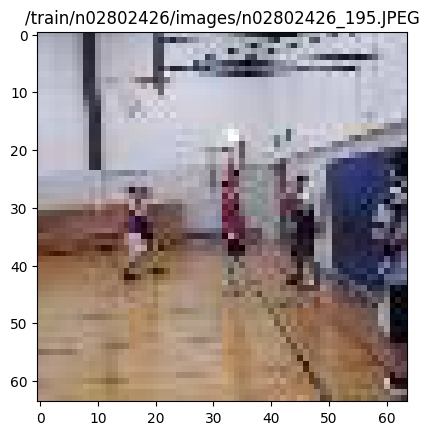

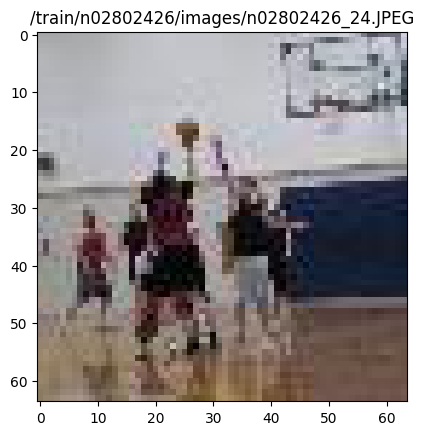

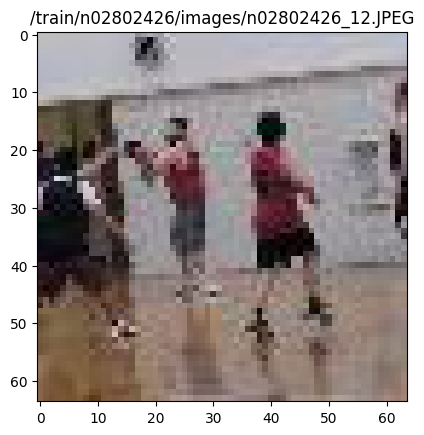

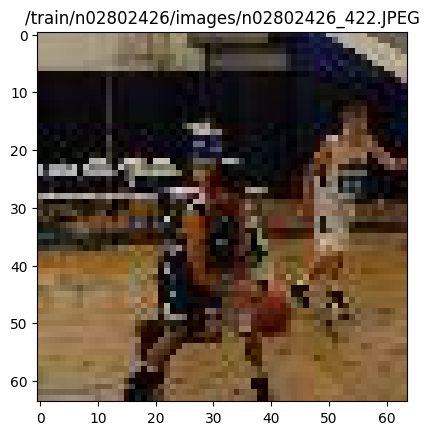

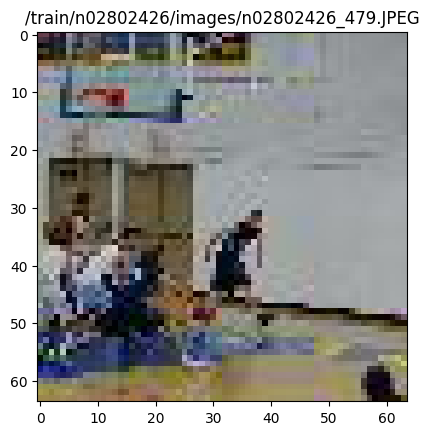

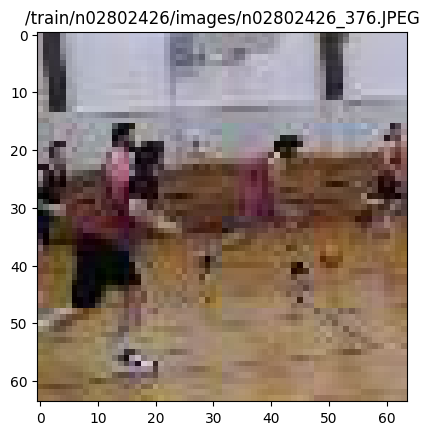

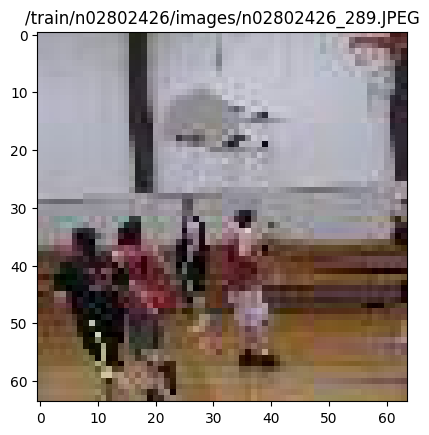

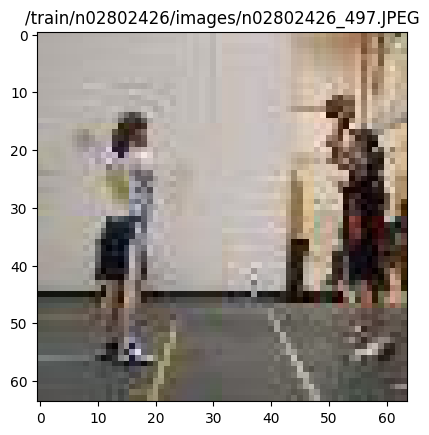

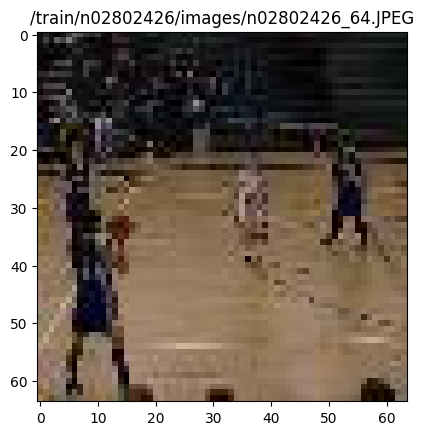

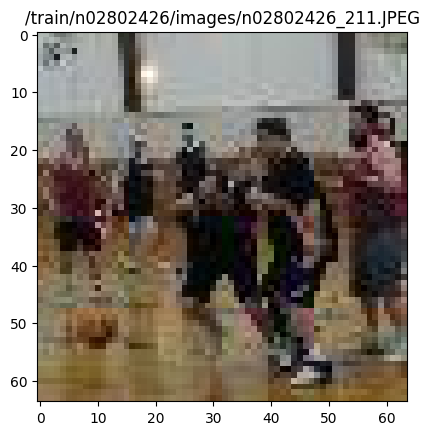

In [130]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your images
IMAGENET_DIR = IMAGENET_DIR+'/'
# Loop through the matches in total_res
for match in total_res[0]['matches']:
    # Get the image file name
    image_file_name = match['id']
    
    # Open the image file
    image = Image.open(f"{IMAGENET_DIR}{image_file_name}")

    # Display the image
    plt.imshow(image)
    plt.title(image_file_name)
    plt.show()
